## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_file = pd.read_csv(r'D:\archive\shopping_customer.csv')

In [12]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
a = data_file.iloc[:, [3,4]].values

#### USING ELBOW METHOD TO FIND OPTIMAL NUMBER OF CLUSTERS 

In [63]:
from sklearn.cluster import KMeans

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++',  random_state=0)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)

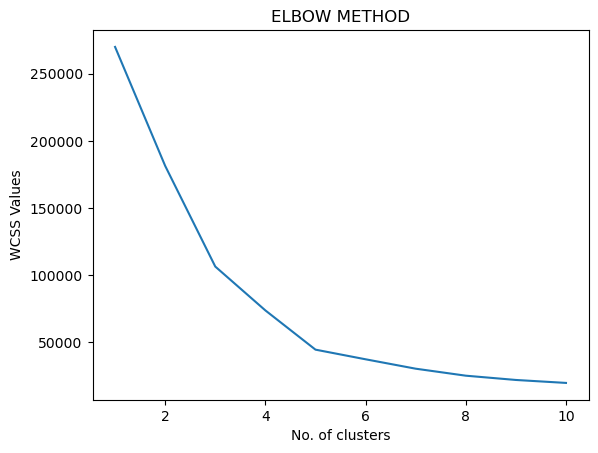

In [66]:
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()

#### TRAINING A MODEL USING K-MEANS ALGORITHM

In [67]:
kmeans_model = KMeans(n_clusters = 5, init='k-means++', random_state=0)

In [68]:
p_kmeans = kmeans_model.fit_predict(a)

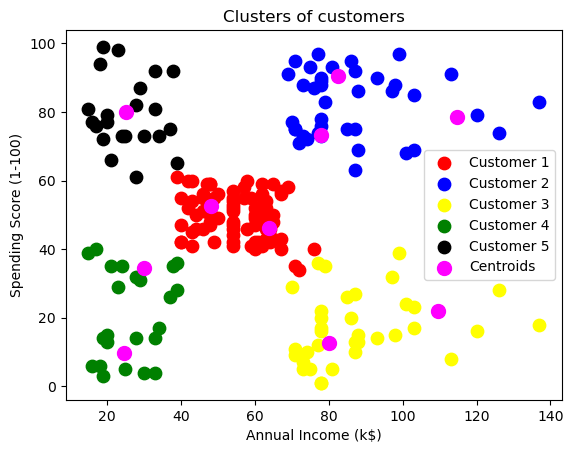

In [69]:
plt.scatter(a[p_kmeans == 0,0], a[p_kmeans == 0,1], s=80, c ="red", label='Customer 1')
plt.scatter(a[p_kmeans == 1,0], a[p_kmeans == 1,1], s=80, c ="blue", label='Customer 2')
plt.scatter(a[p_kmeans == 2,0], a[p_kmeans == 2,1], s=80, c ="yellow", label='Customer 3')
plt.scatter(a[p_kmeans == 3,0], a[p_kmeans == 3,1], s=80, c ="green", label='Customer 4')
plt.scatter(a[p_kmeans == 4,0], a[p_kmeans == 4,1], s=80, c ="black", label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()